In [1]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# CLIP 모델 불러오기
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 이미지 임베딩 추출 함수
def get_image_embedding(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        embeddings = model.get_image_features(**inputs)
    return embeddings.cpu().numpy().flatten()

In [39]:
import os

import re

def natural_key(filename):
    # 숫자 추출해서 정렬 기준으로 사용 (예: 흥부돼지국밥_4.jpg → 4)
    num = re.search(r'_(\d+)\.jpg$', filename)
    return int(num.group(1)) if num else float('inf')





file_root = './data/사진_정제/'
restaurants = os.listdir(file_root)
image_paths = []
for restaurant in restaurants:
    path = os.path.join(file_root, restaurant)
    path = path + '/' + os.listdir(path)[0]
    #path = path + '/' + sorted(os.listdir(path), key=natural_key)[0]
    # path = os.path.join(path, os.listdir(path)[0], )
    image_paths.append(path)
image_paths

['./data/사진_정제/60년 전통 할매국밥/60년 전통 할매국밥_0.jpg',
 './data/사진_정제/가야공원돼지국밥/가야공원돼지국밥_11.jpg',
 './data/사진_정제/가야돼지국밥/가야돼지국밥_10.jpg',
 './data/사진_정제/경주박가국밥/경주박가국밥_0.jpg',
 './data/사진_정제/경주전통돼지국밥/경주전통돼지국밥_1.jpg',
 './data/사진_정제/고려돼지국밥/고려돼지국밥_12.jpg',
 './data/사진_정제/교통부돼지국밥/교통부돼지국밥_10.jpg',
 './data/사진_정제/금문돼지국밥/금문돼지국밥_1.jpg',
 './data/사진_정제/남해돼지국밥/남해돼지국밥_0.jpg',
 './data/사진_정제/늘찬돼지국밥/늘찬돼지국밥_0.jpg',
 './data/사진_정제/다복 돼지국밥/다복 돼지국밥_12.jpg',
 './data/사진_정제/당감동 돼지국밥/당감동 돼지국밥_12.jpg',
 './data/사진_정제/돌고래돼지국밥/돌고래돼지국밥_12.jpg',
 './data/사진_정제/두번째 늘해랑/두번째 늘해랑_14.jpg',
 './data/사진_정제/또순이돼지국밥/또순이돼지국밥_11.jpg',
 './data/사진_정제/마루돼지국밥/마루돼지국밥_14.jpg',
 './data/사진_정제/명지돼지국밥/명지돼지국밥_1.jpg',
 './data/사진_정제/목촌돼지국밥 서동점/목촌돼지국밥 서동점_1.jpg',
 './data/사진_정제/몽실종가돼지국밥 감천문화마을 본점/몽실종가돼지국밥 감천문화마을 본점_1.jpg',
 './data/사진_정제/미광돼지국밥/미광돼지국밥_0.jpg',
 './data/사진_정제/밀양돼지국밥/밀양돼지국밥_1.jpg',
 './data/사진_정제/밀양삼대국밥/밀양삼대국밥_1.jpg',
 './data/사진_정제/백양돼지국밥/백양돼지국밥_1.jpg',
 './data/사진_정제/별미청 돼지국밥/별미청 돼지국밥_11.jpg',
 './data/사진_정제/병천순대국밥/병천순대국밥_1.jp

In [40]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# 전체 이미지 임베딩
embeddings = []
for path in tqdm(image_paths):
    emb = get_image_embedding(path)
    embeddings.append(emb)
embeddings = np.array(embeddings)

# 유사도 행렬 계산
similarity_matrix = cosine_similarity(embeddings)

100%|██████████| 98/98 [00:06<00:00, 15.52it/s]


In [41]:
# 인덱스로 비교 (0번째 사진 기준)
target_index = 49
def get_top_k_similar(sim_matrix, file_names, target_idx, top_k=5):
    scores = sim_matrix[target_idx]
    top_indices = scores.argsort()[::-1][1:top_k+1]
    return [(file_names[i], scores[i]) for i in top_indices]

# 결과 출력
top_similar = get_top_k_similar(similarity_matrix, image_paths, target_index, top_k=5)
print(f"📌 기준 이미지: {image_paths[target_index]}")
print("🔗 유사한 이미지 TOP 5:")
for name, score in top_similar:
    print(f"{name}: 유사도 {score:.4f}")

📌 기준 이미지: ./data/사진_정제/영진돼지국밥 본점/영진돼지국밥 본점_11.jpg
🔗 유사한 이미지 TOP 5:
./data/사진_정제/진주돼지국밥/진주돼지국밥_6.jpg: 유사도 0.8580
./data/사진_정제/조방돼지국밥/조방돼지국밥_1.jpg: 유사도 0.8556
./data/사진_정제/소문난장터돼지국밥/소문난장터돼지국밥_13.jpg: 유사도 0.8476
./data/사진_정제/재기돼지국밥/재기돼지국밥_0.jpg: 유사도 0.8439
./data/사진_정제/연돼지국밥/연돼지국밥_18.jpg: 유사도 0.8402


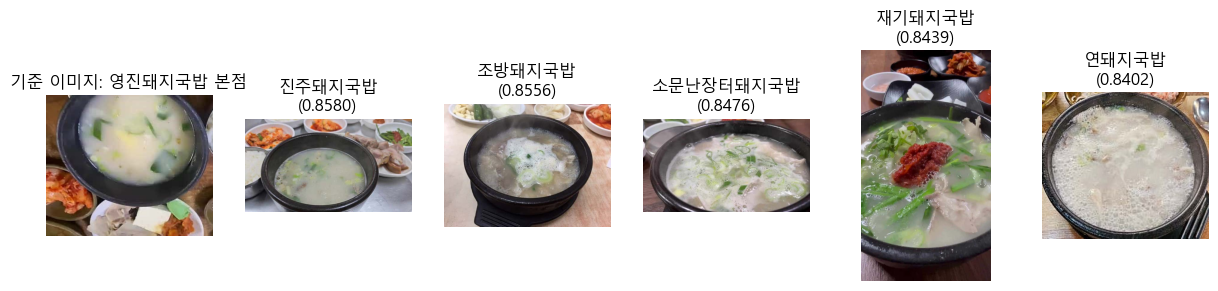

In [42]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# OS에 따라 한글 폰트 설정
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # '맑은 고딕' 경로
elif platform.system() == 'Darwin':  # macOS
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
else:  # Linux (예: Ubuntu)
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



def show_images(images, titles):
    plt.figure(figsize=(15, 3))
    for i, (img_path, title) in enumerate(zip(images, titles)):
        img = Image.open(img_path)
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

# 기준 + 유사 이미지 시각화
show_images(
    [image_paths[target_index]] + [name for name, _ in top_similar],
    [f"기준 이미지: {image_paths[target_index].split('/')[-1].split('_')[0]}"] + [f"{name.split('/')[-1].split('_')[0]}\n({score:.4f})" for name, score in top_similar]
)

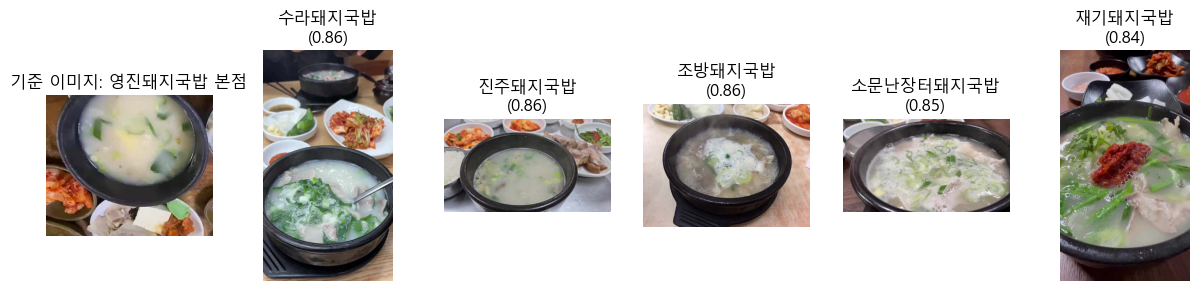

In [45]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# OS에 따라 한글 폰트 설정
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # '맑은 고딕' 경로
elif platform.system() == 'Darwin':  # macOS
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
else:  # Linux (예: Ubuntu)
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



def show_images(images, titles):
    plt.figure(figsize=(15, 3))
    for i, (img_path, title) in enumerate(zip(images, titles)):
        img = Image.open(img_path)
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

# 기준 + 유사 이미지 시각화
show_images(
    [image_paths[target_index]] + [name for name, _ in top_similar],
    [f"기준 이미지: {image_paths[target_index].split('/')[-1].split('_')[0]}"] + [f"{name.split('/')[-1].split('_')[0]}\n({score:.2f})" for name, score in top_similar]
)

In [49]:
from tqdm import tqdm

# 파일 구조: ./data/사진_정제/가게이름/사진들
file_root = './data/사진_정제/'
restaurants = os.listdir(file_root)

restaurant_embeddings = {}  # {가게이름: [임베딩1, 임베딩2, ...]}

for restaurant in tqdm(restaurants):
    folder_path = os.path.join(file_root, restaurant)
    image_files = os.listdir(folder_path)
    image_paths = [os.path.join(folder_path, f) for f in image_files]

    embeddings = [get_image_embedding(p) for p in image_paths]
    restaurant_embeddings[restaurant] = embeddings


100%|██████████| 99/99 [07:47<00:00,  4.72s/it]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def average_pairwise_similarity(emb_list_a, emb_list_b):
    sim_sum = 0
    count = 0
    for emb_a in emb_list_a:
        for emb_b in emb_list_b:
            sim = cosine_similarity([emb_a], [emb_b])[0][0]
            sim_sum += sim
            count += 1
    return sim_sum / count

restaurant_names = list(restaurant_embeddings.keys())
n = len(restaurant_names)
similarity_matrix = np.zeros((n, n))

for i in tqdm(range(n)):
    for j in range(n):
        if i == j:
            similarity_matrix[i, j] = 1.0
        elif i < j:  # 대칭 행렬이므로 절반만 계산
            sim = average_pairwise_similarity(
                restaurant_embeddings[restaurant_names[i]],
                restaurant_embeddings[restaurant_names[j]]
            )
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim


 36%|███▋      | 36/99 [17:43:11<27:31:35, 1572.95s/it]  

In [ ]:
target_index = 5  # 비교할 기준 가게 index
target_name = restaurant_names[target_index]

scores = similarity_matrix[target_index]
top_indices = scores.argsort()[::-1][1:6]  # 상위 5개

print(f"📌 기준 가게: {target_name}")
print("🔗 유사한 가게 TOP 5:")
for idx in top_indices:
    print(f"{restaurant_names[idx]}: 유사도 {scores[idx]:.4f}")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_similar_restaurant_images(restaurant_names, embeddings_dict, file_root, similarity_matrix, target_index, top_k=5):
    target_name = restaurant_names[target_index]
    scores = similarity_matrix[target_index]
    top_indices = scores.argsort()[::-1][1:top_k+1]

    # 가게별 대표 이미지 한 장씩 가져오기 (첫 번째 이미지)
    def get_first_image_path(restaurant_name):
        image_folder = os.path.join(file_root, restaurant_name)
        image_files = sorted(os.listdir(image_folder))
        return os.path.join(image_folder, image_files[0])

    # 시각화용 이미지 경로 및 제목 구성
    image_paths = [get_first_image_path(target_name)] + [get_first_image_path(restaurant_names[i]) for i in top_indices]
    titles = [f"기준: {target_name}"] + [f"{restaurant_names[i]}\n({scores[i]:.2f})" for i in top_indices]

    # 시각화
    plt.figure(figsize=(15, 3))
    for i, (img_path, title) in enumerate(zip(image_paths, titles)):
        img = Image.open(img_path)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.title(title, fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
show_similar_restaurant_images(
    restaurant_names=restaurant_names,
    embeddings_dict=restaurant_embeddings,
    file_root='./data/사진_정제/',
    similarity_matrix=similarity_matrix,
    target_index=5,  # 기준 가게 인덱스
    top_k=5          # 유사한 가게 수
)
